In [39]:
import numpy as np

from stoneforge.petrophysics import shale_volume, porosity, water_saturation
from stoneforge import datasets
from stoneforge.vis import wellplot
import pandas as pd

pd.options.mode.chained_assignment = None

In [40]:
# Accessing Internal Dataframe for IK1 Well
DATA = datasets.NPRAlaska()
DATA.ik1
data_IK1, units_IK1 = DATA.ik1.dataframe(DATA.ik1.data_obj.data)
data_IK1

,DEPT,SP,ILD,ILM,LL8,GR,CALI,RHOB,DRHO,NPHI,DT
0,81.0,-999.0,-999.0,-999.0,-999.0,79.7502,-999.0,-999.0,-999.0,-999.0,-999.0
1,81.5,-999.0,-999.0,-999.0,-999.0,79.9790,-999.0,-999.0,-999.0,-999.0,-999.0
2,82.0,-999.0,-999.0,-999.0,-999.0,79.8643,-999.0,-999.0,-999.0,-999.0,-999.0
3,82.5,-999.0,-999.0,-999.0,-999.0,79.9446,-999.0,-999.0,-999.0,-999.0,-999.0
4,83.0,-999.0,-999.0,-999.0,-999.0,80.1459,-999.0,-999.0,-999.0,-999.0,-999.0
...,...,...,...,...,...,...,...,...,...,...,...
30796,15479.0,-999.0,-999.0,-999.0,-999.0,-999.0000,-999.0,-999.0,-999.0,-999.0,-999.0
30797,15479.5,-999.0,-999.0,-999.0,-999.0,-999.0000,-999.0,-999.0,-999.0,-999.0,-999.0
30798,15480.0,-999.0,-999.0,-999.0,-999.0,-999.0000,-999.0,-999.0,-999.0,-999.0,-999.0
30799,15480.5,-999.0,-999.0,-999.0,-999.0,-999.0000,-999.0,-999.0,-999.0,-999.0,-999.0


In [41]:
# Accessing Internal Dataframe units for IK1 Well
print(units_IK1)

{'DEPT': 'F', 'SP': 'MV', 'ILD': 'OHMM', 'ILM': 'OHMM', 'LL8': 'OHMM', 'GR': 'GAPI', 'CALI': 'IN', 'RHOB': 'G/C3', 'DRHO': 'G/C3', 'NPHI': '%', 'DT': 'US/F'}


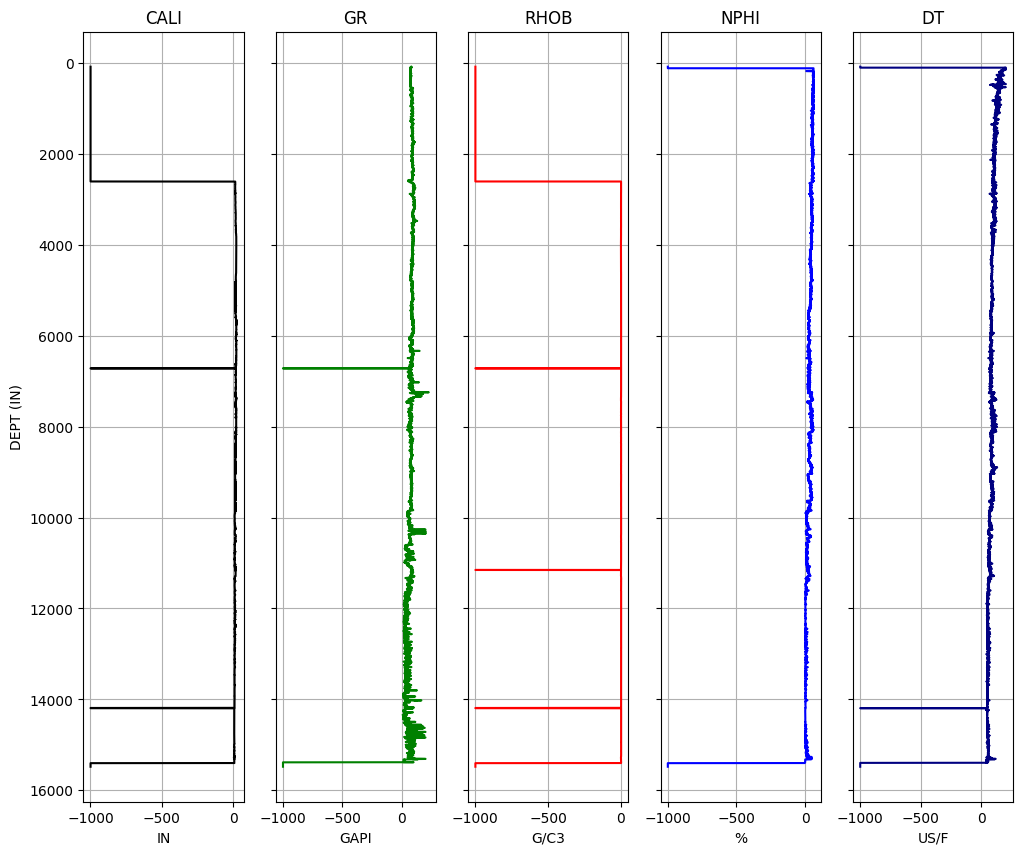

In [42]:
# Viewing Well Log Data
curves = ["CALI","GR","RHOB","NPHI","DT"]
units = []
for c in curves:
    units.append(units_IK1[c])

color = ["k","g","r","b","navy"]

wellplot(data_IK1,"DEPT",curves, color, units)

In [43]:
# Removing specific values
# OBS: you can use "df.dropna(inplace=True)" to remove all np.nan values

data_IK1_c = data_IK1[~data_IK1.isin([-999.0]).any(axis=1)]
data_IK1_c

,DEPT,SP,ILD,ILM,LL8,GR,CALI,RHOB,DRHO,NPHI,DT
5050,2606.0,-49.0435,8.79390,8.61980,10.12370,58.4196,12.7783,2.2600,-0.2832,53.4228,93.7696
5051,2606.5,-50.4799,8.77080,8.59250,9.92250,59.8769,12.8500,2.2708,-0.3078,53.2102,93.4603
5052,2607.0,-52.1082,8.74770,8.53700,11.22560,61.2937,12.9218,2.2329,-0.3134,52.3063,92.4409
5053,2607.5,-51.1442,8.72480,8.48190,11.70970,63.3657,12.9935,2.2289,-0.2684,50.3678,92.9883
5054,2608.0,-47.5747,8.95780,8.42720,10.47900,65.9798,13.0652,2.2394,-0.1042,50.0560,93.7045
...,...,...,...,...,...,...,...,...,...,...,...
30506,15334.0,-11.3880,629.85712,1703.66248,1422.14807,16.8156,6.9289,2.6577,0.0468,-0.9550,54.3735
30507,15334.5,-5.4272,615.84058,1695.59717,1417.44800,16.3250,6.9282,2.6595,0.0582,-0.9549,47.2565
30508,15335.0,-7.8805,740.49573,1719.76306,1412.76270,15.7515,6.9275,2.6887,0.0742,-0.9566,41.9826
30509,15335.5,-9.9414,807.49799,1757.75037,1408.09375,15.6002,6.9268,2.6746,0.0637,-0.9584,38.9155


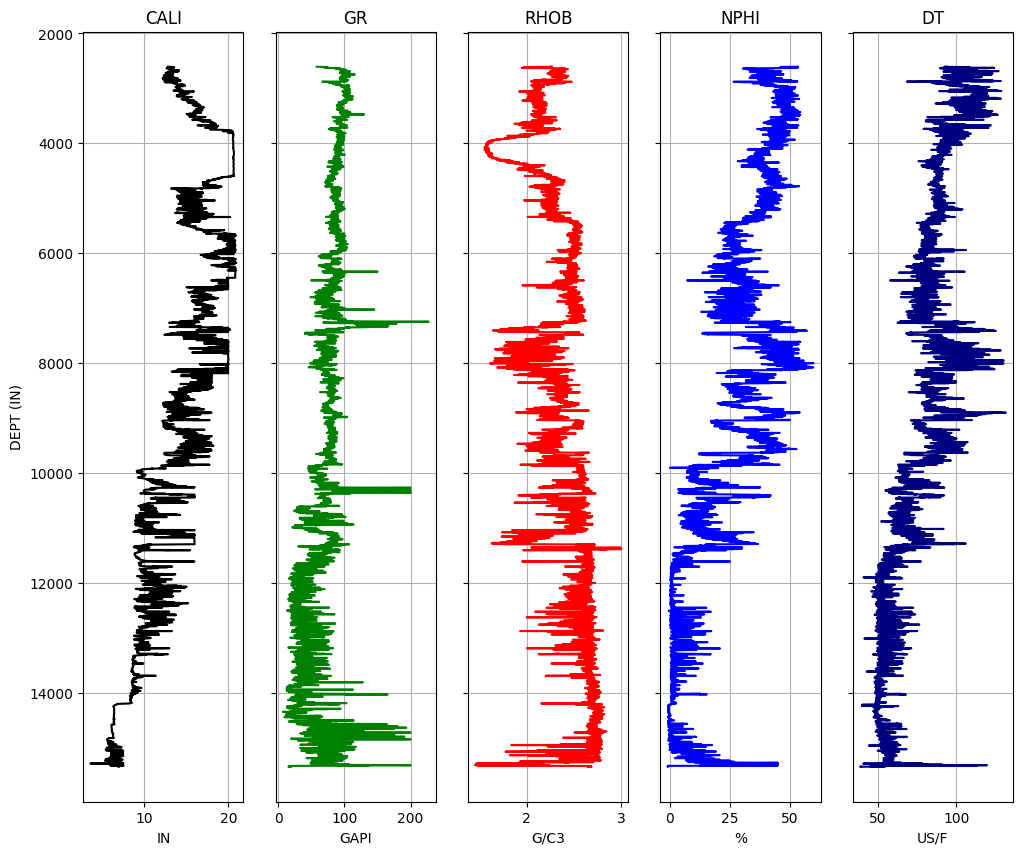

In [44]:
# Viewing Cleaned Well Log Data
wellplot(data_IK1_c,"DEPT",curves, color, units)

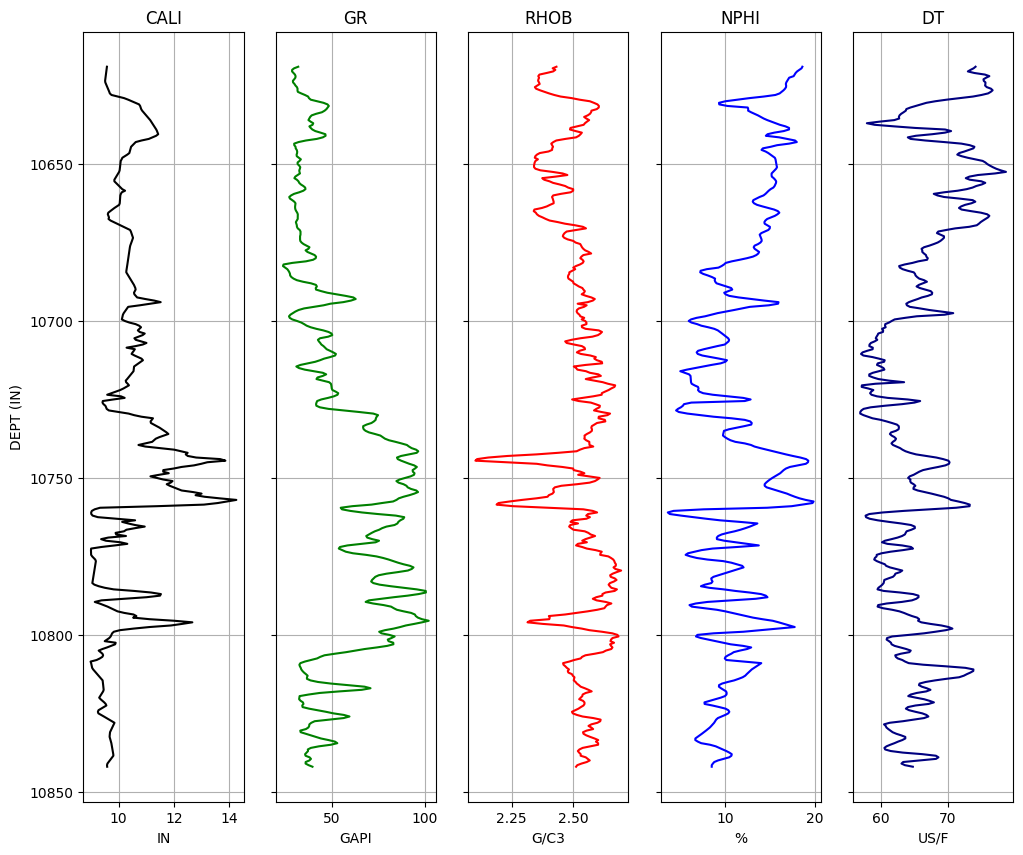

In [45]:
# Taking specific range in depth for analysis (ledge sandstone interval)
LEDGE_SANDSTONE = data_IK1_c[data_IK1_c['DEPT'].between(10619, 10842)]
wellplot(LEDGE_SANDSTONE,"DEPT",curves, color, units)

In [46]:
# Preparing data for VSH
GR = np.array(LEDGE_SANDSTONE["GR"])
GR_min = np.percentile(GR, 10)
GR_max = np.percentile(GR, 90)
print("GR_min:",GR_min,"|GR_max:",GR_max)

GR_min: 30.78398 |GR_max: 88.65426000000001


In [47]:
LEDGE_SANDSTONE

,DEPT,SP,ILD,ILM,LL8,GR,CALI,RHOB,DRHO,NPHI,DT
21076,10619.0,-92.3719,5.6534,7.5047,10.3189,32.1681,9.5756,2.4324,0.0280,18.5964,74.0643
21077,10619.5,-92.6030,5.4512,7.1849,9.8774,29.9718,9.5682,2.4169,0.0243,18.5066,73.7811
21078,10620.0,-92.8108,5.2563,6.9832,9.3140,28.8898,9.5609,2.4278,0.0214,18.2585,73.3278
21079,10620.5,-93.0186,5.0684,6.7872,8.3432,28.8571,9.5536,2.4187,0.0232,18.0104,72.9256
21080,10621.0,-93.2263,4.9828,6.7115,7.1612,29.6683,9.5463,2.3921,0.0221,17.8458,73.9007
...,...,...,...,...,...,...,...,...,...,...,...
21518,10840.0,-84.3232,15.8031,24.9516,38.3127,38.1211,9.6802,2.5684,0.0246,9.2279,65.8097
21519,10840.5,-83.6495,18.1204,25.9377,29.7650,36.1407,9.6372,2.5561,0.0323,8.8146,63.3392
21520,10841.0,-82.9757,23.8513,37.9959,22.8938,36.0931,9.5941,2.5345,0.0364,8.6617,63.0884
21521,10841.5,-82.3019,24.9165,54.6157,25.3613,37.6945,9.5790,2.5176,0.0275,8.5357,63.5907


In [48]:
# Preparing data for VSH
GR = np.array(LEDGE_SANDSTONE["GR"])
GR_min = np.percentile(GR, 10)
GR_max = np.percentile(GR, 90)
print("GR_min:",GR_min,"|GR_max:",GR_max)

LEDGE_SANDSTONE["VSH_larionov"] = shale_volume.vshale(method="larionov", gr=GR,grmin=GR_min,grmax=GR_max)
LEDGE_SANDSTONE["VSH_larionov_old"] = shale_volume.vshale(method="larionov_old", gr=GR,grmin=GR_min,grmax=GR_max)
LEDGE_SANDSTONE["VSH_clavier"] = shale_volume.vshale(method="clavier", gr=GR,grmin=GR_min,grmax=GR_max)

NPHI = np.array(LEDGE_SANDSTONE["NPHI"])/100.
RHOB = np.array(LEDGE_SANDSTONE["RHOB"])

LEDGE_SANDSTONE["VSH_Bhuyan_Passey"] = shale_volume.vshale_neu_den(NPHI, RHOB)

GR_min: 30.78398 |GR_max: 88.65426000000001


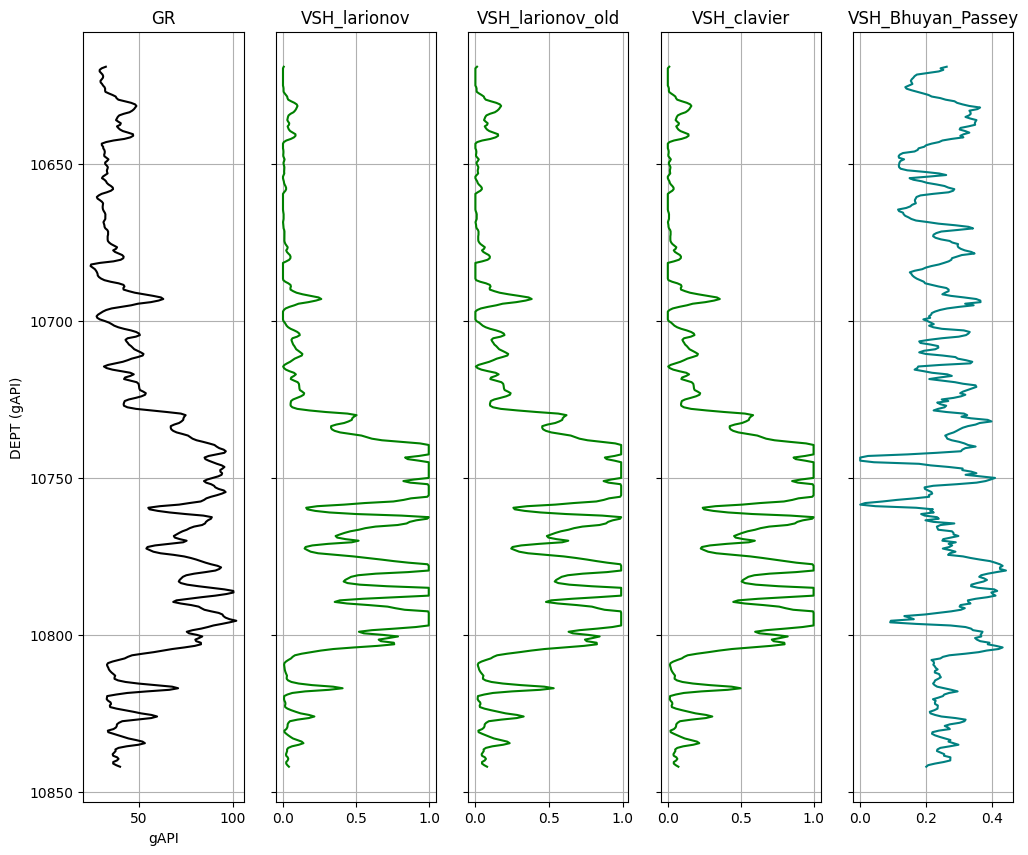

In [49]:
# Plotting VSH results
curves = ["GR","VSH_larionov","VSH_larionov_old","VSH_clavier","VSH_Bhuyan_Passey"]
units = ["gAPI","","","",""]
color = ["k","g","g","g","teal"]

wellplot(LEDGE_SANDSTONE,"DEPT",curves, color, units)

In [50]:
# Preparing data for porosity
NPHI = np.array(LEDGE_SANDSTONE["NPHI"])/100.
RHOB = np.array(LEDGE_SANDSTONE["RHOB"])
# method="clavier", gr=GR,grmin=GR_min,grmax=GR_max
LEDGE_SANDSTONE["PHI_density"] = porosity.porosity(method = "density", rhob = RHOB, rhom = 2.65, rhof = 1.10)
LEDGE_SANDSTONE["PHI_neutron"] = porosity.porosity(method = "neutron", nphi = NPHI, vsh = np.array(LEDGE_SANDSTONE["VSH_larionov_old"]), phish = 0.17)

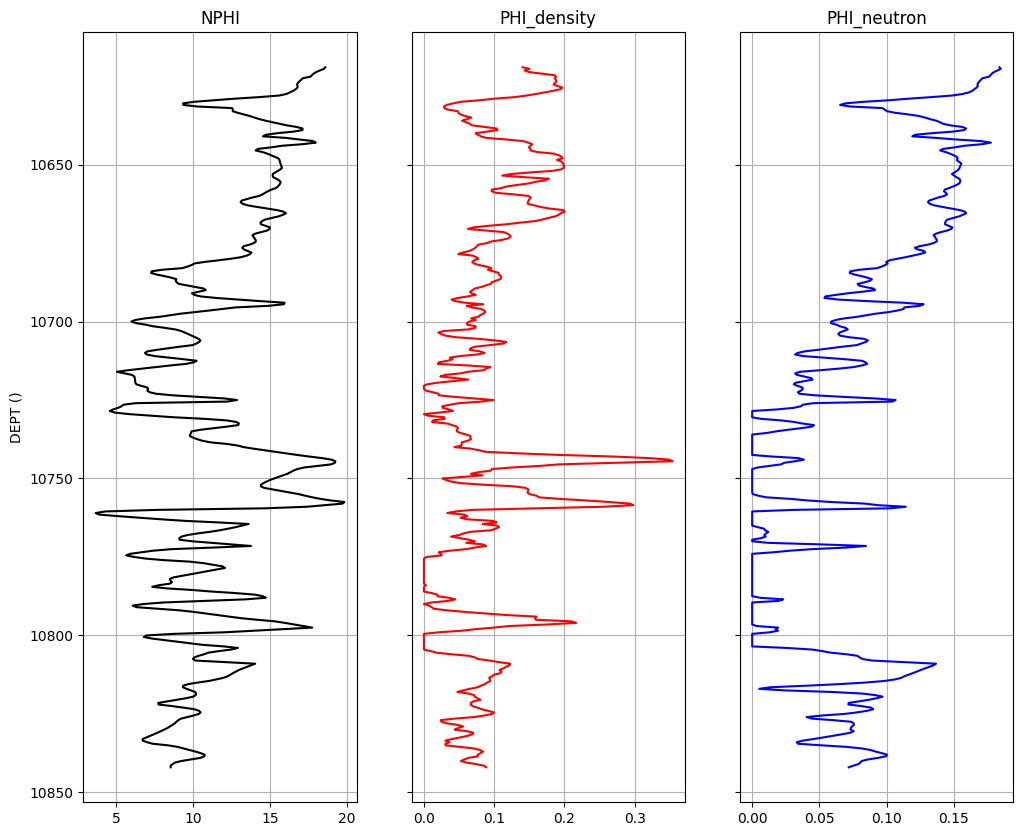

In [51]:
# Plotting Porosity results
curves = ["NPHI","PHI_density","PHI_neutron"]
units = ["","",""]
color = ["k","r","b"]

wellplot(LEDGE_SANDSTONE,"DEPT",curves, color, units)

In [52]:
# Preparing data for water saturation
LEDGE_SANDSTONE["WS"] = water_saturation.water_saturation(
    method="archie", rw=0.02, rt=LEDGE_SANDSTONE["ILD"], phi=LEDGE_SANDSTONE["PHI_density"], a=1, m=2 , n=2)

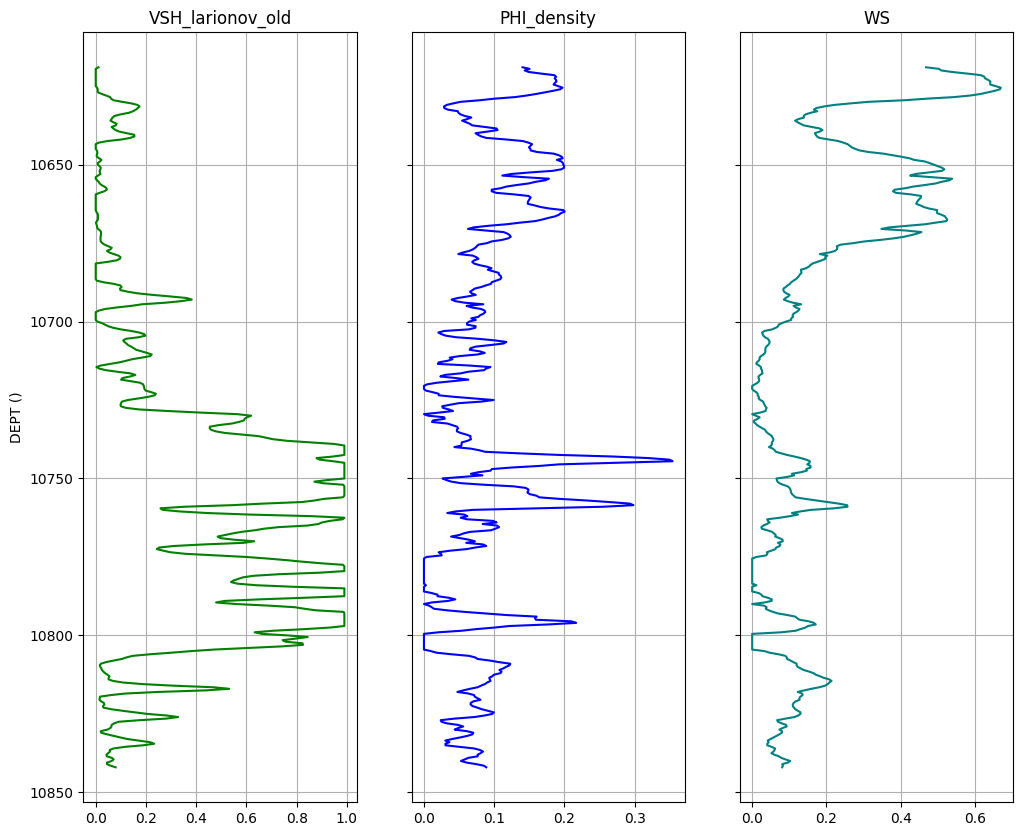

In [53]:
# Plotting Water Saturation results
curves = ["VSH_larionov_old","PHI_density","WS"]
units = ["","",""]
color = ["g","b","teal"]

wellplot(LEDGE_SANDSTONE,"DEPT",curves, color, units)